In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')


def write_to_file(name, data):
    with open(f'{name}.txt', 'w') as file:
        file.write(str(data))

In [27]:
import csv

with open('checkins.dat') as dat_file, open('checkins.csv', 'w') as csv_file:
    csv_writer = csv.writer(csv_file)
    for line in dat_file:
        row = [field.strip() for field in line.split('|')]
        if len(row) == 6 and row[3] and row[4]:
            csv_writer.writerow(row)

In [28]:
data = pd.read_csv('checkins.csv')

In [29]:
data

,id,user_id,venue_id,latitude,longitude,created_at
0,984222,15824,5222,38.895112,-77.036366,2012-04-21 17:43:47
1,984234,44652,5222,33.800745,-84.410520,2012-04-21 17:43:43
2,984291,105054,5222,45.523452,-122.676207,2012-04-21 17:39:22
3,984318,2146539,5222,40.764462,-111.904565,2012-04-21 17:35:46
4,984232,93870,380645,33.448377,-112.074037,2012-04-21 17:38:18
...,...,...,...,...,...,...
396629,955561,626076,20073,40.850100,-73.866246,2012-04-13 09:56:48
396630,955892,674797,2297,33.748995,-84.387982,2012-04-13 10:56:03
396631,956377,845102,11195,42.765366,-71.467566,2012-04-13 12:08:45
396632,956119,1139114,29488,42.439479,-83.743830,2012-04-13 11:36:44


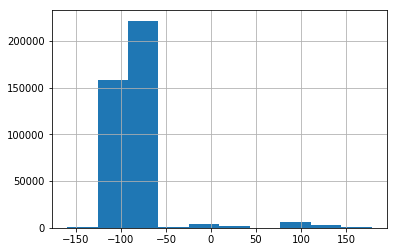

In [31]:
data['longitude'].hist()

In [32]:
from sklearn.cluster import MeanShift

In [33]:
ms = MeanShift(bandwidth=0.1)

In [47]:
X = data.loc[:100000, ['latitude', 'longitude']]

In [48]:
ms.fit(X)

MeanShift(bandwidth=0.1, bin_seeding=False, cluster_all=True, min_bin_freq=1,
     n_jobs=1, seeds=None)

In [49]:
ms.labels_

array([ 5,  7, 30, ..., 19,  4,  4])

In [51]:
ms.cluster_centers_

array([[  40.7177164 ,  -73.99183542],
       [  33.44943805, -112.00213969],
       [  33.44638027, -111.90188756],
       ...,
       [  38.891565  , -121.2930079 ],
       [  42.5953378 ,  -78.9411461 ],
       [  41.5822716 ,  -85.8344383 ]])

In [55]:
labels = pd.Series(ms.labels_)

In [70]:
labels_counts = labels.value_counts() > 15

In [96]:
new_idx = np.array(labels_counts.index[labels.value_counts() > 15])

In [103]:
cluster_centers = ms.cluster_centers_[new_idx]

In [100]:
company_offices = np.array([[33.751277, -118.188740],
                           [25.867736, -80.32411],
                           [51.503016, -0.075479],
                           [52.378894, 4.885084],
                           [39.366487, 117.036146],
                           [-33.868457, 151.205134]])

In [102]:
def measure_distance(lat_1, lon_1, lat_2, lon_2):
    return ((lat_1 - lat_2) ** 2 + (lon_1 - lon_2) ** 2) ** 0.5

In [116]:
min_distances = []
for cluster in cluster_centers:
    min_distance = None
    lat_1, lon_1 = cluster[0], cluster[1]
    for office in company_offices:
        lat_2, lon_2 = office[0], office[1]
        distance = measure_distance(lat_1, lon_1, lat_2, lon_2)
        if min_distance is None or distance < min_distance:
            min_distance = distance
    min_distances.append(min_distance)

In [118]:
clusters = pd.DataFrame(cluster_centers)

In [120]:
clusters['min_dist'] = min_distances

In [144]:
clusters.sort_values('min_dist').head(5)

,0,1,min_dist
397,-33.860630,151.204776,0.007835
366,52.372964,4.892317,0.009353
395,25.845672,-80.318891,0.022673
57,51.502991,-0.125537,0.050058
52,33.809878,-118.148924,0.070848


In [143]:
write_to_file('ans1', '-33.86063 151.204776')